# Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Akira\Documents\Instacart Basket Analysis'

In [3]:
ords_prods_customer = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [4]:
ords_prods_customer.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,first_name,Surnam,gender,STATE,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.000000,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.000000,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.000000,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.000000,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Histogram of order_hour_of_day

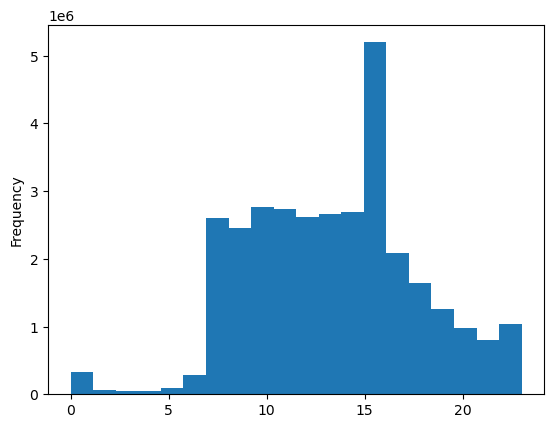

In [5]:
hist = ords_prods_customer['order_hour_of_day'].plot.hist(bins = 20)

In the histogram above, it shows the frequency of orders based on hours of the day. Based on the analysis, I can see that there is a spike of orders at 16:00, or 4:00 pm. This can be observed as customers ordering groceries that are necessary for the dinner of that night. Most users may have issues of going to the store because of kids or work, so this is a possible reasoning why there is a spike of orders at this time.

In [23]:
#exporting visualization
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'orders_hour_of_day.png'))

# Loyalty Flag Bar Chart

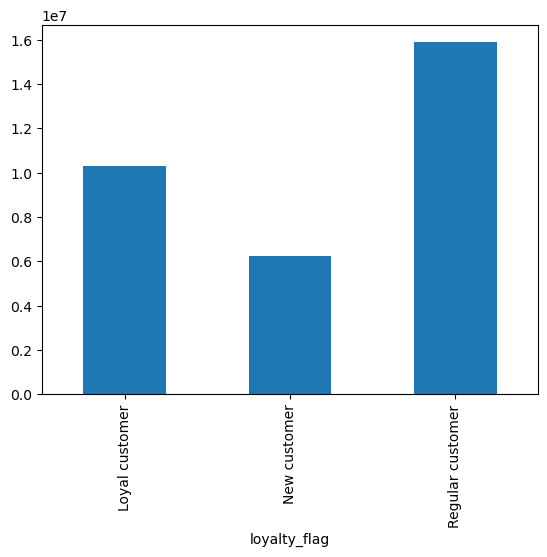

In [6]:
# running the same code, but including a sort index function to keep it organized

bar = ords_prods_customer['loyalty_flag'].value_counts().sort_index().plot.bar()

Based on the visualization above, it is evident that regular customers is considered the highest, followed by loyal, then new customers. This can be relayed to the marketing team that we are on the right track in terms of retaining cutomers, but there can be added incentives to increase the loyal customer base.

In [24]:
#exporting visualization
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_flag.png'))

# Checking the correlation between prices and hour of the day

In [7]:
# splitting the dataframe into two sections
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customer)) <= 0.7

In [8]:
# Store 70% of the sample into the big dataframe

big = ords_prods_customer[dev]

In [9]:
# Store 30% of the sample into the small dataframe

small = ords_prods_customer[~dev]

In [10]:
# making sure the big and small dataframe equals the total dataframe

len(ords_prods_customer)

32404859

In [11]:
len(big) + len(small)

32404859

In [13]:
df_2 = small[['order_hour_of_day','prices']]

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

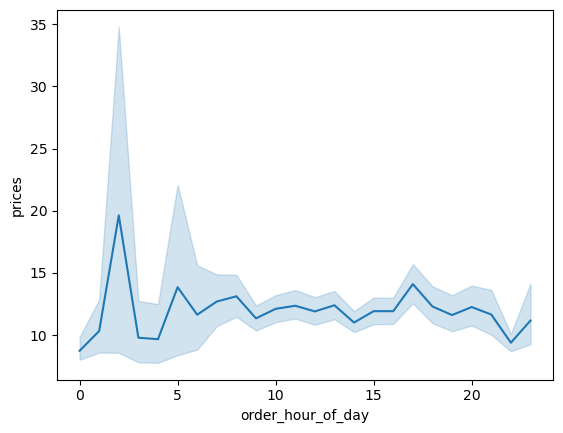

In [14]:
# Line plot command

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

There is a varying difference in prices of items depending on the time of day. There seems to be larger spikes at midnight and 5am.

In [25]:
#exporting visualization
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'prices_throughout_day.png'))

# Line Chart of Age and Number of Dependants

In [15]:
df_3 = small[['num_of_dependants','age']]

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

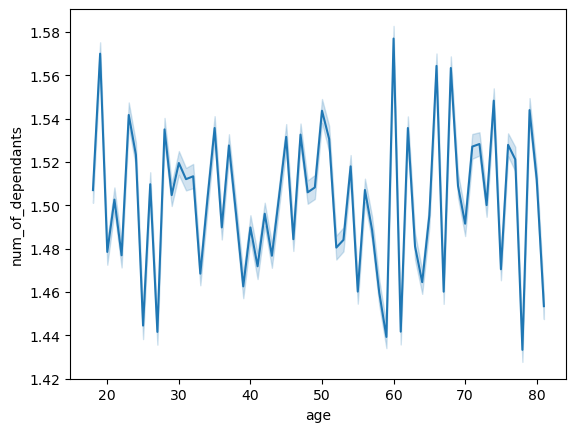

In [19]:
# Line plot command

line_2 = sns.lineplot(data = df_3, x = 'age',y = 'num_of_dependants')

From this visualization, it is apparent to say that there is no correlation between age and number of dependents. However there is an average of 1-2 kids for adults of all ages based on this visualization, so the family dynamic is very apparent.

In [26]:
#exporting visualization
line_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_number_of_dependents.png'))

# Scatterplot between age and income

In [21]:
df_4 = small[['income','age']]

C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Akira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


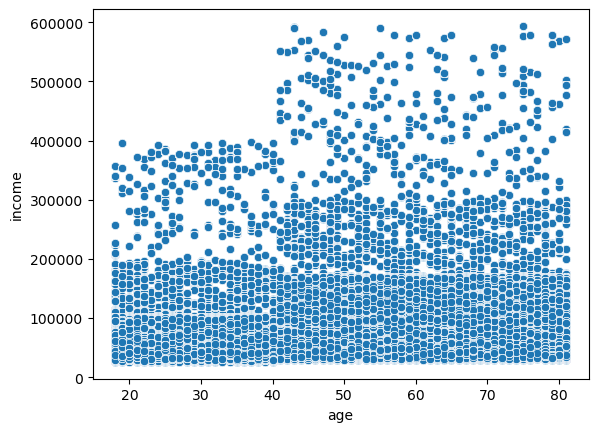

In [22]:
scat = sns.scatterplot(x = 'age', y = 'income', data = df_4)

In this scatterplot visualization, it is shown that there is a slight correlation between age and income. Majority of people live under the 200k annual salary mark, however as the age increases, you see outliers that can range up to the 600k mark.

In [27]:
#exporting visualization
scat.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income.png'))